In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
df = pd.read_csv('/content/PlayTennis.csv')

# Normalize column names (optional but helpful for consistency)
df.columns = df.columns.str.strip().str.lower()
print("Normalized columns in the dataset:", df.columns)

# Step 2: Encode categorical features
encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le  # Save the encoder for later use

# Split data into features and target
X = df.drop(columns=['play'])  # Match normalized column name
y = df['play']

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Step 5: Visualize Decision Rules
tree_rules = export_text(model, feature_names=X.columns.tolist())
print("\nDecision Tree Rules:")
print(tree_rules)



Normalized columns in the dataset: Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

Decision Tree Rules:
|--- outlook <= 0.50
|   |--- class: 1
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- windy <= 0.50
|   |   |   |--- outlook <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- outlook >  1.50
|   |   |   |   |--- class: 0
|   |   |--- windy >  0.50
|   |   |   |--- class: 0
|   |--- humidity >  0.50
|   |   |--- windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- windy >  0.50
|   |   |   |--- outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- outlook >  1.50
|   |   |   |   |--- class: 1



#EXP :2

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/Iris.csv"
data = pd.read_csv(file_path)

# Display first few rows of data
print(data.head())

# Drop unnecessary columns if any (like 'id' if it exists)
data = data.drop(columns=["Id"], errors='ignore')  # ignores if 'Id' column does not exist

# Separate features and target variable
X = data.drop(columns=["Species"])
y = data["Species"]

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train SVM model
clf = SVC(kernel="linear", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Test new samples
new_samples = pd.DataFrame({
    "SepalLengthCm": [5.1, 7.2],
    "SepalWidthCm": [3.5, 3.6],
    "PetalLengthCm": [1.4, 6.1],
    "PetalWidthCm": [0.2, 2.5]
})
new_predictions = clf.predict(new_samples)
new_predictions_labels = label_encoder.inverse_transform(new_predictions)

print("\nPredictions for new samples:", new_predictions_labels)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Predictions for new samples: ['Iris-setosa' 'Iris-virginica']


#EXP 3:

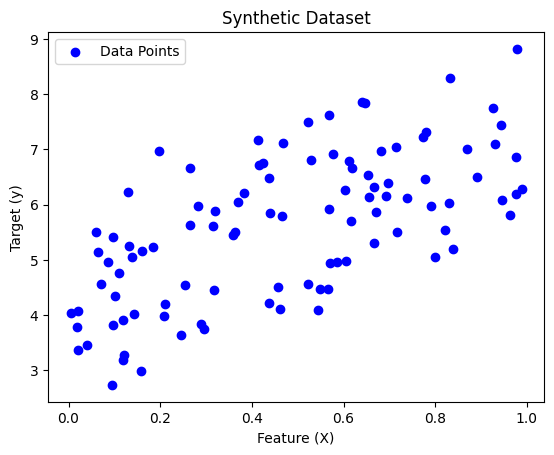

Linear Regression MSE: 0.99
Linear Regression R²: 0.42


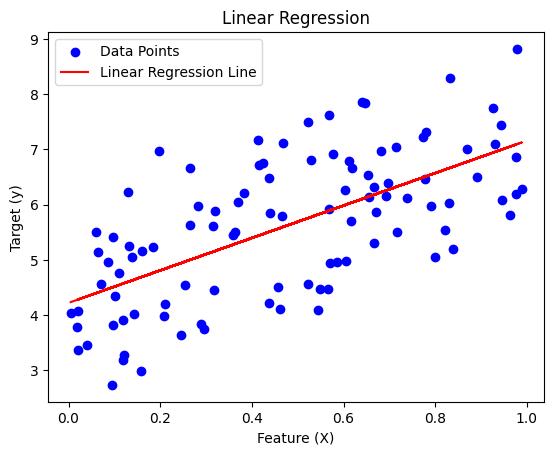

Polynomial Regression MSE: 0.97
Polynomial Regression R²: 0.43


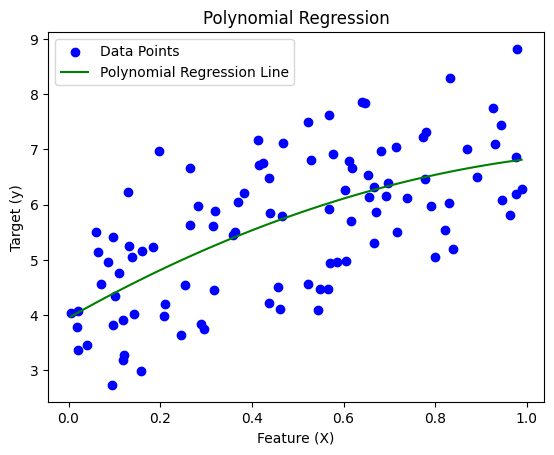

Ridge Regression MSE: 1.00
Ridge Regression R²: 0.41


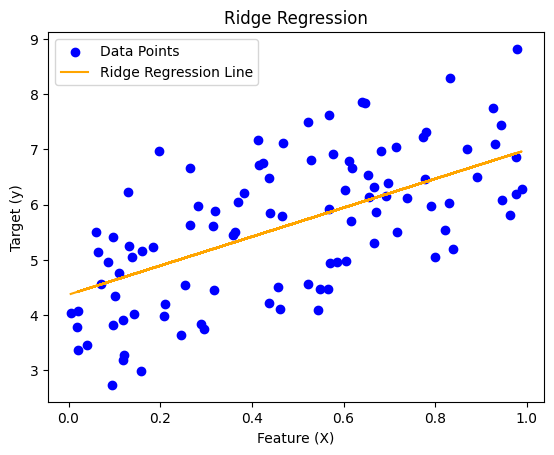

Model Comparison
Linear Regression MSE: 0.99, R²: 0.42
Polynomial Regression MSE: 0.97, R²: 0.43
Ridge Regression MSE: 1.00, R²: 0.41


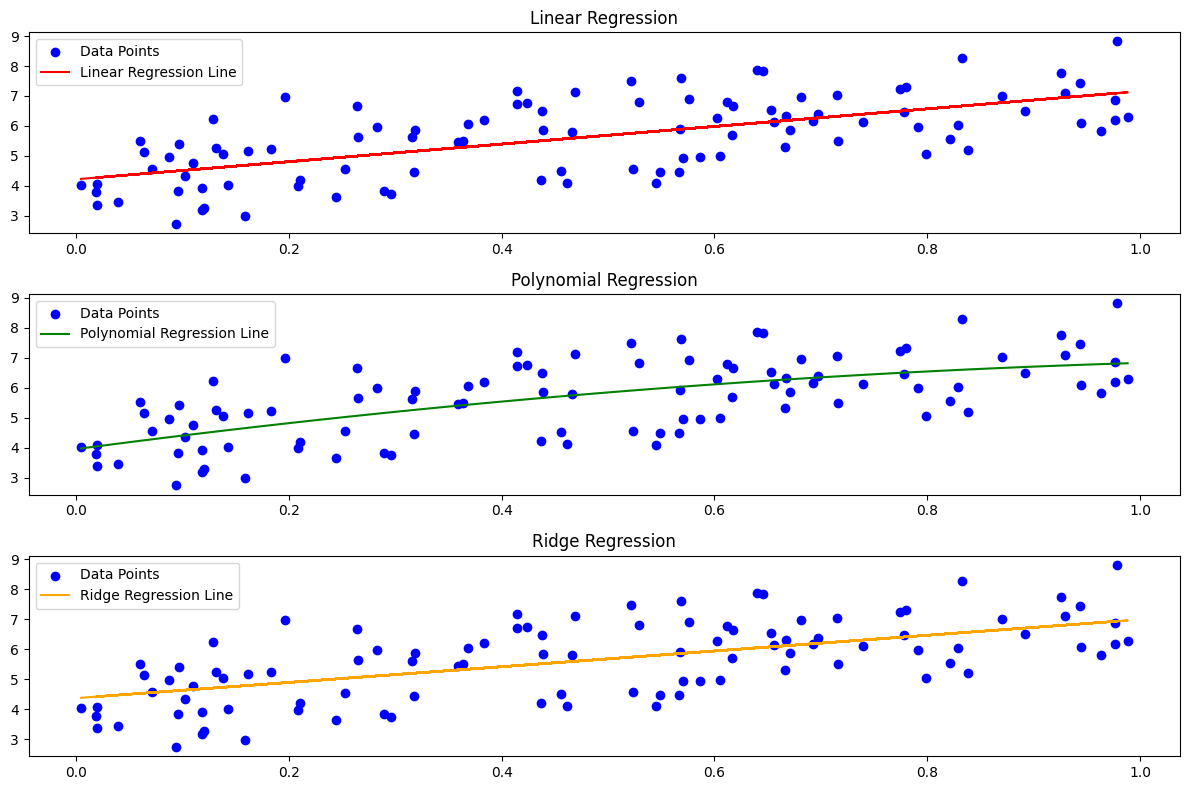

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the synthetic dataset
plt.scatter(X, y, color='blue', marker='o', label='Data Points')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Synthetic Dataset')
plt.legend()
plt.show()

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

print(f"Linear Regression MSE: {mse_lin:.2f}")
print(f"Linear Regression R²: {r2_lin:.2f}")

# Plot Linear Regression
plt.scatter(X, y, color='blue', marker='o', label='Data Points')
plt.plot(X, y_pred_lin, color='red', label='Linear Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly:.2f}")
print(f"Polynomial Regression R²: {r2_poly:.2f}")

# Plot Polynomial Regression
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = poly_reg.predict(X_range_poly)

plt.scatter(X, y, color='blue', marker='o', label='Data Points')
plt.plot(X_range, y_range_pred, color='green', label='Polynomial Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.2f}")

# Plot Ridge Regression
plt.scatter(X, y, color='blue', marker='o', label='Data Points')
plt.plot(X, y_pred_ridge, color='orange', label='Ridge Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Ridge Regression')
plt.legend()
plt.show()

# Model Comparison
print("Model Comparison")
print(f"Linear Regression MSE: {mse_lin:.2f}, R²: {r2_lin:.2f}")
print(f"Polynomial Regression MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")

# Combined plots for comparison
plt.figure(figsize=(12, 8))

# Linear Regression plot
plt.subplot(3, 1, 1)
plt.scatter(X, y, color='blue', marker='o', label='Data Points')
plt.plot(X, y_pred_lin, color='red', label='Linear Regression Line')
plt.title('Linear Regression')
plt.legend()

# Polynomial Regression plot
plt.subplot(3, 1, 2)
plt.scatter(X, y, color='blue', marker='o', label='Data Points')
plt.plot(X_range, y_range_pred, color='green', label='Polynomial Regression Line')
plt.title('Polynomial Regression')
plt.legend()

# Ridge Regression plot
plt.subplot(3, 1, 3)
plt.scatter(X, y, color='blue', marker='o', label='Data Points')
plt.plot(X, y_pred_ridge, color='orange', label='Ridge Regression Line')
plt.title('Ridge Regression')
plt.legend()

plt.tight_layout()
plt.show()

#Exp:4

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
dataset = pd.read_csv("/content/Iris.csv")

# Display a random sample of the dataset
print(dataset.sample(5))

# Preprocess the data
dataset['BinarySpecies'] = dataset['Species'].apply(lambda x: 1 if x != 'Iris-setosa' else 0)

# Features and target variable
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = dataset['BinarySpecies']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")  `
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# New samples for prediction
new_samples = pd.DataFrame({
    "SepalLengthCm": [5.0, 6.5],
    "SepalWidthCm": [3.5, 3.0],
    "PetalLengthCm": [1.4, 4.6],
    "PetalWidthCm": [0.2, 1.5]
})

# Normalize new samples
new_samples_scaled = scaler.transform(new_samples)

# Predict the species for new samples
new_predictions = knn.predict(new_samples_scaled)

# Interpret the predictions
predictions_interpreted = ["Not Iris-setosa" if pred == 1 else "Iris-setosa" for pred in new_predictions]
print(f"Interpreted predictions for new samples: {predictions_interpreted}")


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
110  111            6.5           3.2            5.1           2.0   
146  147            6.3           2.5            5.0           1.9   
135  136            7.7           3.0            6.1           2.3   
63    64            6.1           2.9            4.7           1.4   
87    88            6.3           2.3            4.4           1.3   

             Species  
110   Iris-virginica  
146   Iris-virginica  
135   Iris-virginica  
63   Iris-versicolor  
87   Iris-versicolor  
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Interpreted predictions for new samples: ['Iris-setosa', 'Not Iris-setosa']


#Exp:5

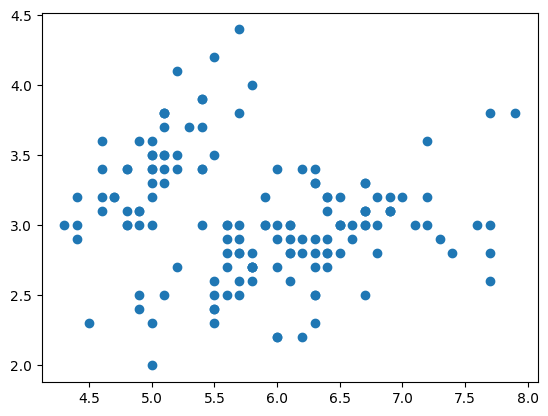

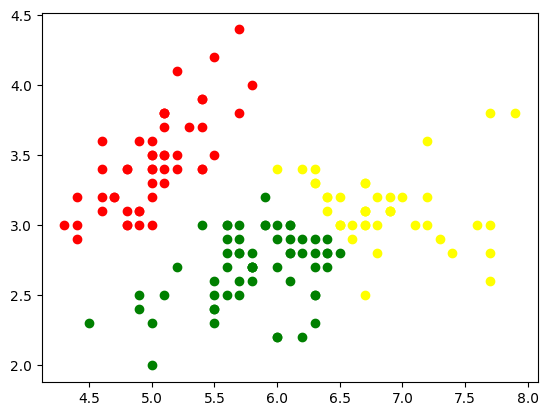

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture

# load the iris dataset
iris = load_iris()
# select first two columns
X = iris.data[:, :2]
# turn it into a dataframe
d = pd.DataFrame(X)
# plot the data
plt.scatter(d[0], d[1])
plt.show()

# Define the model
gmm = GaussianMixture(n_components = 3)
# Fit the GMM model for the dataset
gmm.fit(d)
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()

#EXP:6

<Axes: >

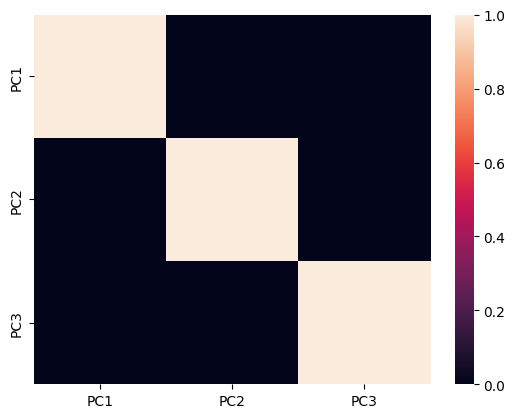

In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()

#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df))
scaled_data

#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

#Exp 7:

The predicted cluster for VAR1 = 0.906 and VAR2 = 0.606 is: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


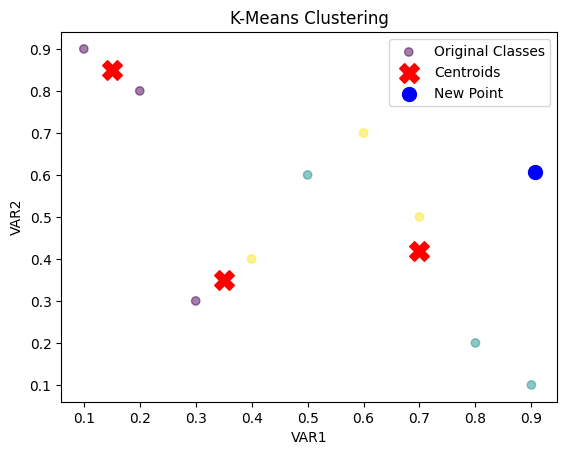

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Data
data = {
    'VAR1': [0.1, 0.2, 0.8, 0.9, 0.3, 0.4, 0.7, 0.6, 0.5],
    'VAR2': [0.9, 0.8, 0.2, 0.1, 0.3, 0.4, 0.5, 0.7, 0.6],
    'Class': [0, 0, 1, 1, 0, 2, 2, 2, 1]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Select features for clustering
X = df[['VAR1', 'VAR2']]

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Predict a new data point
new_data_point = np.array([[0.906, 0.606]])
predicted_cluster = kmeans.predict(new_data_point)

print(f"The predicted cluster for VAR1 = 0.906 and VAR2
= 0.606 is: {predicted_cluster[0]}")

# Plot the original data points
plt.scatter(df['VAR1'], df['VAR2'], c=df['Class'], label='Original Classes', cmap='viridis', alpha=0.5)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Plot the new data point
plt.scatter(new_data_point[0, 0], new_data_point[0, 1], c='blue', marker='o', s=100, label='New Point')

# Add titles and labels
plt.title("K-Means Clustering")
plt.xlabel("VAR1")
plt.ylabel("VAR2")
plt.legend()
plt.show()

#Exp: 8

Sample Dataset:
     outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes

Encoded Dataset:
     outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0

Accuracy of Naive Bayes Classifier: 100.00%

Confusion Matrix:
 [[1 0]
 [0 2]]


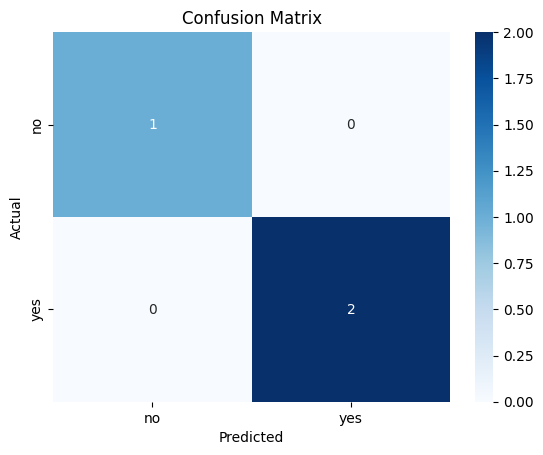


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('/content/PlayTennis.csv')
print("Sample Dataset:\n", df.head())

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

print("\nEncoded Dataset:\n", df)

# Splitting the dataset into features and target
X = df.drop(columns="play")  # Features (outlook, temp, humidity, wind)
y = df['play']  # Target (play: Yes or No)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = nb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Naive Bayes Classifier: {accuracy * 100:.2f}%")

# Generating and displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generating and displaying the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

#EXP:9

In [21]:
import numpy as np
x=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[86],[89]),dtype=float)
x=x/np.amax(x,axis=0)
y=y/100

# Sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

# Derivative of sigmoid function
def derivatives_sigmoid(x):
  return x*(1-x)

# Variable initialization
epoch=5000
lr=0.1
inputlayer_neurons=2
hiddenlayer_neurons=3
output_neurons=1

# weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

# draws a random range Of numbers Of dim x*y
for i in range(epoch):
  # Forward Propogation
  hinp1=np.dot(x,wh)
  hinp=hinp1+bh
  hlayer_act=sigmoid(hinp)
  outinp1=np.dot(hlayer_act,wout)
  outinp=outinp1+bout
  output=sigmoid(outinp)
  # Backward Propogation
  EO=y-output
  outgrad=derivatives_sigmoid(output)
  d_output=EO*outgrad
  EH=d_output.dot(wout.T)
  # how much hidden layer wts contributed to error
  hiddengrad=derivatives_sigmoid(hlayer_act)
  d_hiddenlayer=EH*hiddengrad
  # dot product Of next layererror and current layerop
  wout+=hlayer_act.T.dot(d_output)*lr
  wh+=x.T.dot(d_hiddenlayer)*lr

print("Input: \n"+str(x))
print("Actual Output: \n"+str(y))
print("Predicted Output: \n",output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89503163]
 [0.88037369]
 [0.89433984]]
